In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('dataset_2.csv')
df

,ShearRate,Stress,Viscosity
0,0.10,0.002950,0.029500
1,0.20,0.006410,0.032050
2,0.35,0.009847,0.028134
3,0.70,0.015470,0.022100
4,1.00,0.020300,0.020300
5,2.00,0.031100,0.015550
6,3.50,0.044700,0.012771
7,7.00,0.072000,0.010286
8,10.00,0.091800,0.009180
9,20.00,0.149000,0.007450


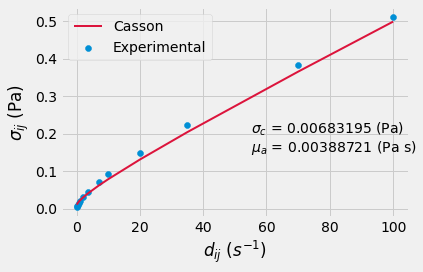

In [3]:
# Casson
casson_reg = LinearRegression()
casson_reg.fit(df[['ShearRate']] ** 0.5, df.Stress ** 0.5)
casson_yield = casson_reg.intercept_
casson_viscosity = casson_reg.coef_[0]

def casson_model(shear_rates):
    cy = casson_yield ** 2
    cv = casson_viscosity ** 2
    return cy +  cv * shear_rates + 2 * np.math.pow(cy * cv * shear_rates , 0.5)

casson = np.vectorize(casson_model)
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.ShearRate[:13], df.Stress[:13], label='Experimental')
    plt.plot(df.ShearRate[:13], casson(df.ShearRate[:13]), label='Casson', linewidth=2, color='crimson')
    plt.xlabel('$d_{ij}$ $(s^{-1})$')
    plt.ylabel('$\sigma_{ij}$ (Pa)')
    plt.text(55, 0.2, f'$\\sigma_c$ = {casson_yield ** 2:.8f} (Pa)')
    plt.text(55, 0.15, f'$\\mu_a$ = {casson_viscosity ** 2:.8f} (Pa s)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('fig_casson.png', transparent=True, edgecolor=None)
    plt.show()

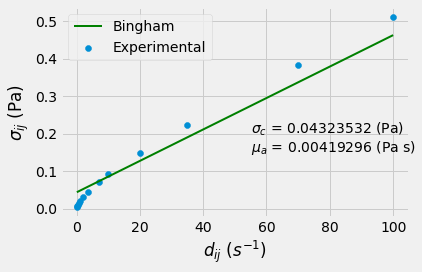

In [4]:
# Bingham
bingham_reg = LinearRegression()
bingham_reg.fit(df[['ShearRate']], df.Stress)
bingham_yield = bingham_reg.intercept_
bingham_viscosity = bingham_reg.coef_[0]

def bingham_model(shear_rates):
    by = bingham_yield
    bv = bingham_viscosity
    return by +  bv * shear_rates

bingham = np.vectorize(bingham_model)
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.ShearRate[:13], df.Stress[:13], label='Experimental')
    plt.plot(df.ShearRate[:13], bingham(df.ShearRate[:13]), label='Bingham', linewidth=2, color='green')
    plt.xlabel('$d_{ij}$ $(s^{-1})$')
    plt.ylabel('$\sigma_{ij}$ (Pa)')
    plt.text(55, 0.2, f'$\\sigma_c$ = {bingham_yield:.8f} (Pa)')
    plt.text(55, 0.15, f'$\\mu_a$ = {bingham_viscosity:.8f} (Pa s)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('fig_bingham.png', transparent=True, edgecolor=None)
    plt.show()

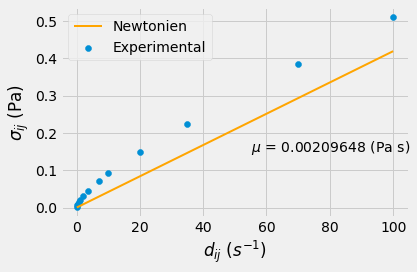

In [5]:
# Newtonian
newtonian_reg = LinearRegression()
newtonian_reg.fit(df[['ShearRate']], df.Stress)
newtonian_viscosity = newtonian_reg.coef_[0] / 2

def newtonian_model(shear_rates):
    nv = newtonian_viscosity
    return 2 * nv * shear_rates

newtonian = np.vectorize(newtonian_model)
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.ShearRate[:13], df.Stress[:13], label='Experimental')
    plt.plot(df.ShearRate[:13], newtonian(df.ShearRate[:13]), label='Newtonien', linewidth=2, color='orange')
    plt.xlabel('$d_{ij}$ $(s^{-1})$')
    plt.ylabel('$\sigma_{ij}$ (Pa)')
    plt.text(55, 0.15, f'$\\mu$ = {newtonian_viscosity:.8f} (Pa s)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('fig_newtonian.png', transparent=True, edgecolor=None)
    plt.show()

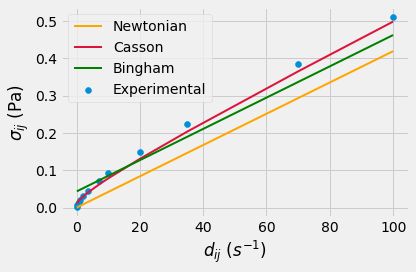

In [6]:
with plt.style.context('fivethirtyeight'):
    plt.scatter(df.ShearRate[:13], df.Stress[:13], label='Experimental')
    plt.plot(df.ShearRate[:13], newtonian(df.ShearRate[:13]), label='Newtonian', linewidth=2, color='orange')
    plt.plot(df.ShearRate[:13], casson(df.ShearRate[:13]), label='Casson', linewidth=2, color='crimson')
    plt.plot(df.ShearRate[:13], bingham(df.ShearRate[:13]), label='Bingham', linewidth=2, color='green')
    plt.xlabel('$d_{ij}$ $(s^{-1})$')
    plt.ylabel('$\sigma_{ij}$ (Pa)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('fig_all.png', transparent=True, edgecolor=None)
    plt.show()

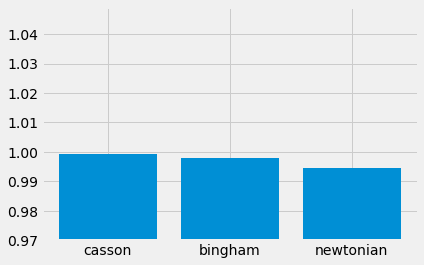

In [95]:
from sklearn.metrics import r2_score
casson_score = r2_score(df[['Stress']], casson(df.ShearRate))
bingham_score = r2_score(df[['Stress']], bingham(df.ShearRate))
newtonian_score = r2_score(df[['Stress']], newtonian(df.ShearRate))
with plt.style.context('fivethirtyeight'):
    plt.bar(['casson', 'bingham', 'newtonian'], [casson_score, bingham_score, newtonian_score])
    plt.ylim(bottom=0.97)